In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [3]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = df.rename(columns={'PassengerId': 'YolcuId', 
                        'Survived': 'Kurtulan',
                        'Pclass': 'BiletSınıfı',
                        'Name': 'İsim',
                        'Sex': 'Cinsiyet',
                        'Age': 'Yaş',
                        'SibSp': 'KardeşEşSayısı',
                        'Parch': 'EbeveynÇocukSayısı',
                        'Ticket': 'BiletNumarası',
                        'Fare': 'Ücret',
                        'Cabin': 'Kabin',
                        'Embarked': 'GemiyeBinen'})

In [7]:
df.head(3)

,YolcuId,Kurtulan,BiletSınıfı,İsim,Cinsiyet,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,BiletNumarası,Ücret,Kabin,GemiyeBinen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
df.describe()

,YolcuId,Kurtulan,BiletSınıfı,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,Ücret
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.corr(numeric_only=True)

,YolcuId,Kurtulan,BiletSınıfı,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,Ücret
YolcuId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Kurtulan,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
BiletSınıfı,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Yaş,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
KardeşEşSayısı,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
EbeveynÇocukSayısı,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Ücret,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


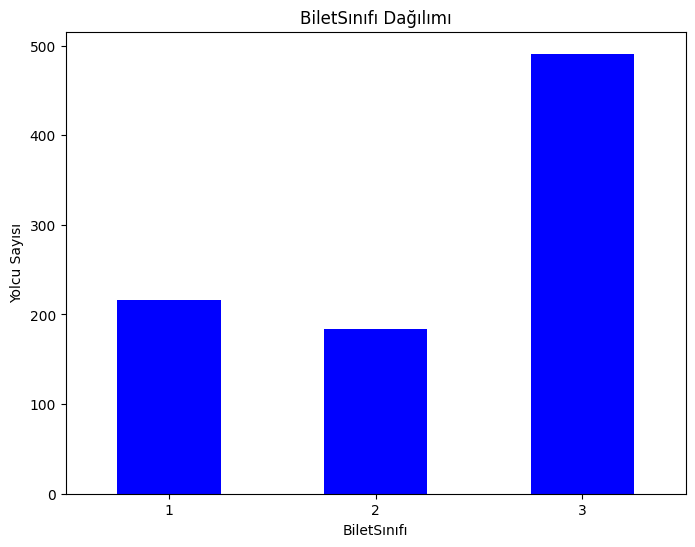

In [10]:
plt.figure(figsize=(8, 6))
df['BiletSınıfı'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('BiletSınıfı Dağılımı')
plt.xlabel('BiletSınıfı')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=0)
plt.show()

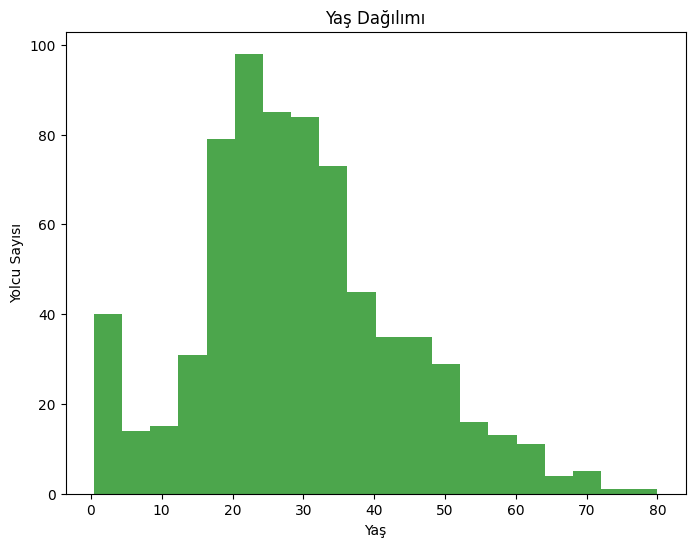

In [11]:
plt.figure(figsize=(8, 6))
df['Yaş'].plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Yolcu Sayısı')
plt.show()


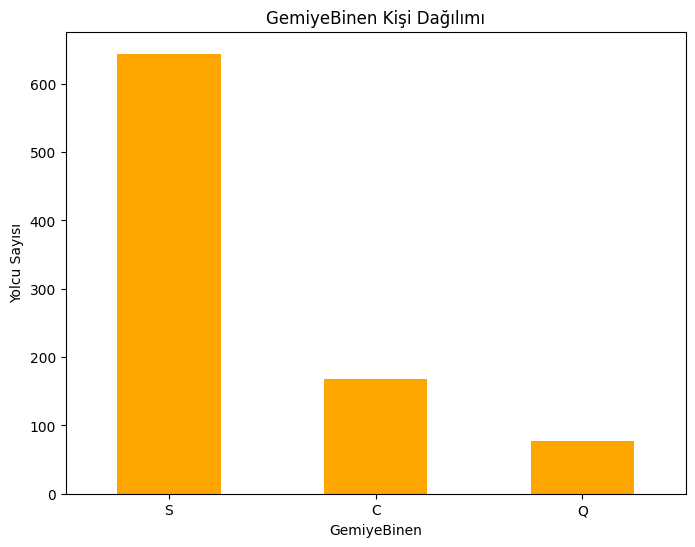

In [12]:
plt.figure(figsize=(8, 6))
df['GemiyeBinen'].value_counts().plot(kind='bar', color='orange')
plt.title('GemiyeBinen Kişi Dağılımı')
plt.xlabel('GemiyeBinen')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=0)
plt.show()

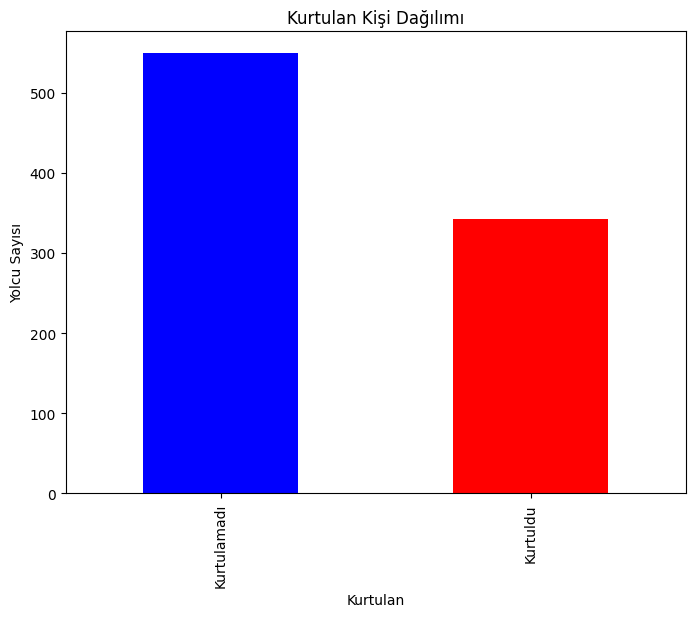

In [13]:
plt.figure(figsize=(8, 6))
df['Kurtulan'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Kurtulan Kişi Dağılımı')
plt.xlabel('Kurtulan')
plt.ylabel('Yolcu Sayısı')
plt.xticks(ticks=[0, 1], labels=['Kurtulamadı', 'Kurtuldu'])
plt.show()

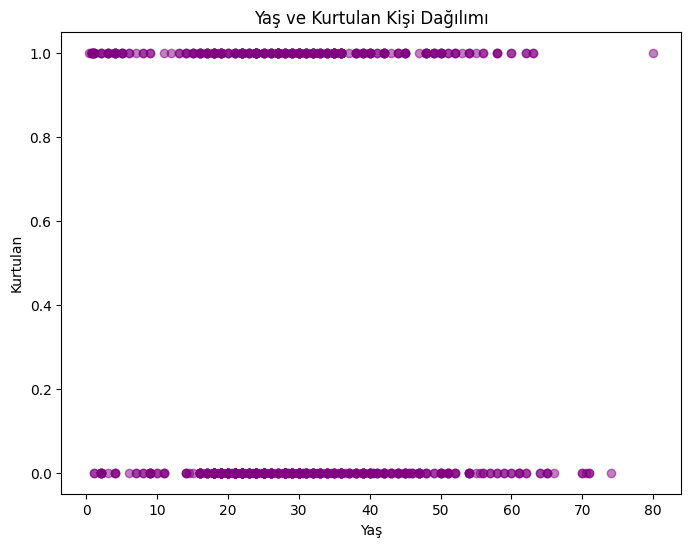

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Yaş'], df['Kurtulan'], color='purple', alpha=0.5)
plt.title('Yaş ve Kurtulan Kişi Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Kurtulan')
plt.show()

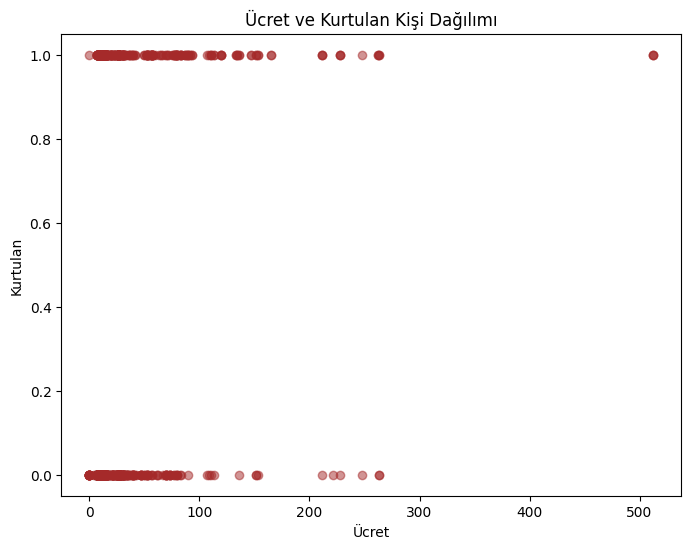

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Ücret'], df['Kurtulan'], color='brown', alpha=0.5)
plt.title('Ücret ve Kurtulan Kişi Dağılımı')
plt.xlabel('Ücret')
plt.ylabel('Kurtulan')
plt.show()

<Figure size 800x600 with 0 Axes>

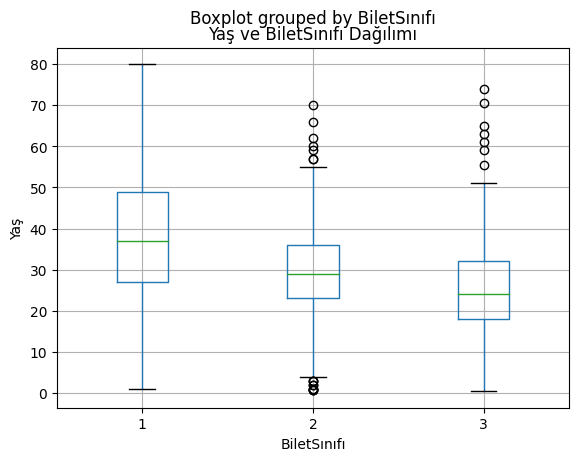

In [16]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Yaş', by='BiletSınıfı')
plt.title('Yaş ve BiletSınıfı Dağılımı')
plt.xlabel('BiletSınıfı')
plt.ylabel('Yaş')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

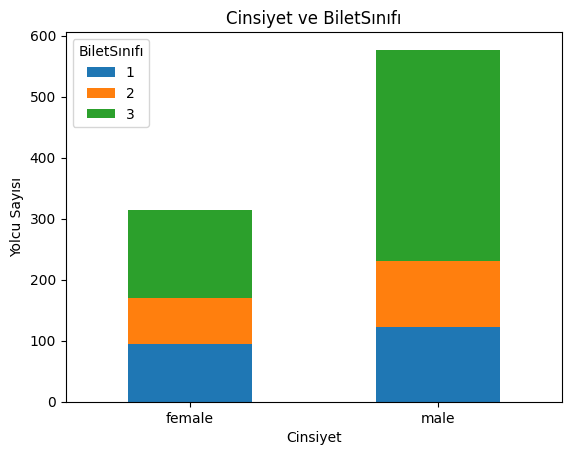

In [17]:
plt.figure(figsize=(8, 6))
df.groupby(['Cinsiyet', 'BiletSınıfı']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Cinsiyet ve BiletSınıfı')
plt.xlabel('Cinsiyet')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

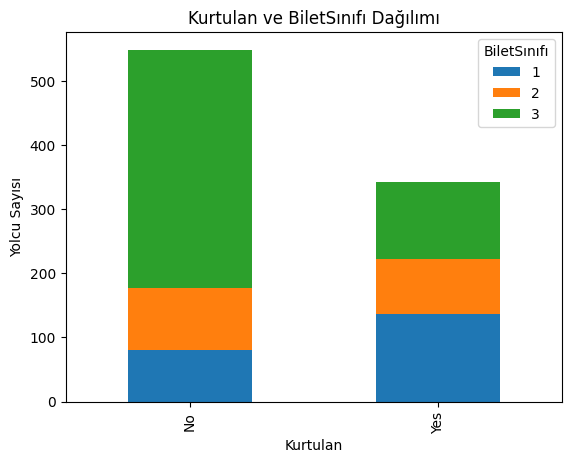

In [18]:
plt.figure(figsize=(8, 6))
df.groupby(['Kurtulan', 'BiletSınıfı']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Kurtulan ve BiletSınıfı Dağılımı')
plt.xlabel('Kurtulan')
plt.ylabel('Yolcu Sayısı')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [19]:
missing_values = df.isnull().sum()
missing_values

YolcuId                 0
Kurtulan                0
BiletSınıfı             0
İsim                    0
Cinsiyet                0
Yaş                   177
KardeşEşSayısı          0
EbeveynÇocukSayısı      0
BiletNumarası           0
Ücret                   0
Kabin                 687
GemiyeBinen             2
dtype: int64

<Axes: >

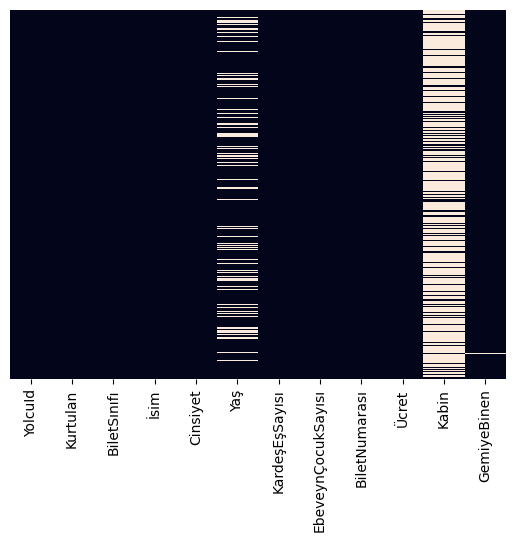

In [20]:
sns.heatmap(df.isna(),yticklabels=False ,cbar=False)

In [21]:
df['Yaş'].fillna(df['Yaş'].median(), inplace=True)

In [22]:
df.drop('Kabin', axis=1, inplace=True)

In [23]:
df['GemiyeBinen'] = df['GemiyeBinen'].fillna(df['GemiyeBinen'].mode()[0])

In [24]:
df.isna().sum().sort_values(ascending=False)

YolcuId               0
Kurtulan              0
BiletSınıfı           0
İsim                  0
Cinsiyet              0
Yaş                   0
KardeşEşSayısı        0
EbeveynÇocukSayısı    0
BiletNumarası         0
Ücret                 0
GemiyeBinen           0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(891, 11)

In [27]:
df.head(3)

,YolcuId,Kurtulan,BiletSınıfı,İsim,Cinsiyet,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,BiletNumarası,Ücret,GemiyeBinen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [28]:
df = pd.get_dummies(df, columns=['Cinsiyet', 'GemiyeBinen'], drop_first=True)

In [29]:
df.head(3)

,YolcuId,Kurtulan,BiletSınıfı,İsim,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,BiletNumarası,Ücret,Cinsiyet_male,GemiyeBinen_Q,GemiyeBinen_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True


In [30]:
X = df.drop(['Kurtulan', 'YolcuId', 'İsim', 'BiletNumarası',], axis=1)
y = df['Kurtulan']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf = RandomForestClassifier(random_state=42)
model=rf.fit(X_train, y_train)
model.score(X,y)

0.9472502805836139

In [33]:
tahmin = rf.score(X_test, y_test)
tahmin

0.8212290502793296

In [34]:
df.sample()

,YolcuId,Kurtulan,BiletSınıfı,İsim,Yaş,KardeşEşSayısı,EbeveynÇocukSayısı,BiletNumarası,Ücret,Cinsiyet_male,GemiyeBinen_Q,GemiyeBinen_S
607,608,1,1,"Daniel, Mr. Robert Williams",27.0,0,0,113804,30.5,True,False,True


In [35]:
X.columns

Index(['BiletSınıfı', 'Yaş', 'KardeşEşSayısı', 'EbeveynÇocukSayısı', 'Ücret',
       'Cinsiyet_male', 'GemiyeBinen_Q', 'GemiyeBinen_S'],
      dtype='object')

In [36]:
model.predict([[3,30,0,0,33.0,False,False,False]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
model.predict([[3,20,0,0,7.0,True,False,True]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])